In [2]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [3]:
data_meteo = pd.read_csv('../data_st/data_meteo_kk.csv')

In [3]:
data_meteo['Название метеостанции'].unique()

array(['Анапа', 'Туапсе', 'Армавир', 'Приморско-Ахтарск',
       'Краснодар, Круглик', 'Сочи', 'Красная поляна'], dtype=object)

In [17]:
X_train = pd.DataFrame({})
y_train = pd.DataFrame({})
for name in ['Приморско-Ахтарск', 'Анапа', 'Краснодар, Круглик', 'Армавир']:
    data_pd = data_meteo.loc[data_meteo['Название метеостанции']==name]['Максимальная скорость']
    stl_data = seasonal_decompose(data_pd.dropna(), period=365*8)
    X_train = pd.concat([X_train, stl_data.trend + stl_data.seasonal], ignore_index=True)
    y_train = pd.concat([y_train, stl_data.resid], ignore_index=True)

X_test = pd.DataFrame({})
y_test = pd.DataFrame({})
for name in ['Туапсе', 'Сочи', 'Красная поляна']:
    data_pd = data_meteo.loc[data_meteo['Название метеостанции']==name]['Максимальная скорость']
    stl_data = seasonal_decompose(data_pd.dropna(), period=365*8)
    X_test = pd.concat([X_test, stl_data.trend + stl_data.seasonal], ignore_index=True)
    y_test = pd.concat([y_test, stl_data.resid], ignore_index=True)
print(X_train.dropna().shape, y_train.dropna().shape)


(508341, 1) (508341, 1)


In [18]:
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X_train.dropna(), y_train.dropna())
xgbr.score(X_train.dropna(), y_train.dropna()) 

0.012662575036846313

In [22]:
y_pred = xgbr.predict(X_test.dropna())
mse = mean_squared_error(y_test.dropna(), y_pred)
print("MSE: %.2f" % mse)

MSE: 8.11


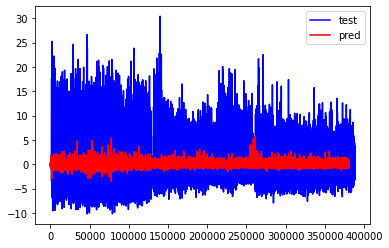

In [23]:
plt.plot(y_test.dropna(), c='b', label='test')
plt.plot(y_pred, c='r', label='pred')
plt.legend()
plt.show()

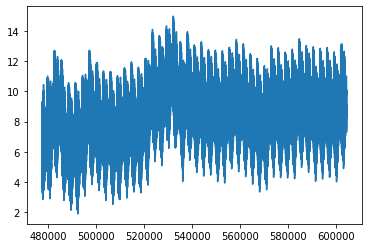

In [13]:
plt.plot(stl_data.trend + stl_data.seasonal)